In [102]:
import tweepy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [103]:
# Connection to the api
api_key = 'f9QDFkLm0hRjJtlqSZMTTEvxZ'
api_key_secret = 'CiS03yMWCwX7Xhubw3AF8wU79F5bDpdU0VtHsC8K24oWBEt7NT'
access_token = '1223293246681559042-jSkfiFCdGtpHTcFMOS7zqvaOWVYmBm'
access_token_secret = 'ITPw91RpeO6ONMiLuKfE8cOeQnHZOvpDSx2oRoOGHn1QL'

#bearer_token = 'AAAAAAAAAAAAAAAAAAAAANNjCQEAAAAA0tQMCT0VtM7NNbjKb5pY%2BUqnzyU%3D5XXmWifVd9R7LJL08OHXaDzdOZttCxETPAycpbsIMCqmxzwSmU'
            # o de cima ê novo tbm

In [104]:
authenticator = tweepy.OAuthHandler(api_key, api_key_secret) 
authenticator.set_access_token(access_token, access_token_secret) 

api = tweepy.API(authenticator, wait_on_rate_limit=True)

In [105]:
crypto_currency = 'Dogecoin'

search = f'#{crypto_currency} -filter:retweets'

tweet_cursor = tweepy.Cursor(api.search_tweets, q=search, lang='en', tweet_mode='extended').items(500) # api.search_tweets

tweets = [tweet.full_text for tweet in tweet_cursor]

In [106]:
new = []
for tw in api.search_tweets(search, count=500):
    date = tw._json['created_at']
    text = tw._json['text']
    new.append({'date': date, 'text': text})

In [107]:
import pandas as pd
tweetsdf = pd.DataFrame(new)

In [108]:
tweetsdf

,date,text
0,Thu Jun 09 11:29:48 +0000 2022,Best Time To Buy Bitcoin (Institutions Still P...
1,Thu Jun 09 11:29:46 +0000 2022,#SRise Whos ready for a new ATH today? 🎁👀\n🔥🔥🔥...
2,Thu Jun 09 11:29:42 +0000 2022,Current #DOGE Price is $0.0802078 #Dogecoin #C...
3,Thu Jun 09 11:29:28 +0000 2022,If your Pet is a part of the family like mine ...
4,Thu Jun 09 11:29:21 +0000 2022,Kripto para piyasasında tek takip edilecek kiş...
...,...,...
92,Thu Jun 09 10:54:09 +0000 2022,#dogecoin #bitcoin #forex #crypto #cryptocurre...
93,Thu Jun 09 10:53:00 +0000 2022,33% Off!\n\nIn the Blood: A Thriller (5) (Term...
94,Thu Jun 09 10:52:54 +0000 2022,BSC Doge is not real #Dogecoin. wen proof. htt...
95,Thu Jun 09 10:52:43 +0000 2022,#dogecoin to $5 by 2025 let’s go $Doge


In [109]:
a = tweetsdf['date'][0].split()
a


['Thu', 'Jun', '09', '11:29:48', '+0000', '2022']

In [110]:
a = a[2] + ' ' + a[1] + ' ' + a[5] #+ ' ' + a[3]

In [111]:
a

'09 Jun 2022'

In [112]:
def date_change(a):

    a = tweetsdf['date'][0].split()

    return a[2] + ' ' + a[1] + ' ' + a[5]

In [113]:
tweetsdf

,date,text
0,Thu Jun 09 11:29:48 +0000 2022,Best Time To Buy Bitcoin (Institutions Still P...
1,Thu Jun 09 11:29:46 +0000 2022,#SRise Whos ready for a new ATH today? 🎁👀\n🔥🔥🔥...
2,Thu Jun 09 11:29:42 +0000 2022,Current #DOGE Price is $0.0802078 #Dogecoin #C...
3,Thu Jun 09 11:29:28 +0000 2022,If your Pet is a part of the family like mine ...
4,Thu Jun 09 11:29:21 +0000 2022,Kripto para piyasasında tek takip edilecek kiş...
...,...,...
92,Thu Jun 09 10:54:09 +0000 2022,#dogecoin #bitcoin #forex #crypto #cryptocurre...
93,Thu Jun 09 10:53:00 +0000 2022,33% Off!\n\nIn the Blood: A Thriller (5) (Term...
94,Thu Jun 09 10:52:54 +0000 2022,BSC Doge is not real #Dogecoin. wen proof. htt...
95,Thu Jun 09 10:52:43 +0000 2022,#dogecoin to $5 by 2025 let’s go $Doge


In [114]:
tweetsdf['date'] = tweetsdf.apply(date_change, axis=1)
tweetsdf

,date,text
0,09 Jun 2022,Best Time To Buy Bitcoin (Institutions Still P...
1,09 Jun 2022,#SRise Whos ready for a new ATH today? 🎁👀\n🔥🔥🔥...
2,09 Jun 2022,Current #DOGE Price is $0.0802078 #Dogecoin #C...
3,09 Jun 2022,If your Pet is a part of the family like mine ...
4,09 Jun 2022,Kripto para piyasasında tek takip edilecek kiş...
...,...,...
92,09 Jun 2022,#dogecoin #bitcoin #forex #crypto #cryptocurre...
93,09 Jun 2022,33% Off!\n\nIn the Blood: A Thriller (5) (Term...
94,09 Jun 2022,BSC Doge is not real #Dogecoin. wen proof. htt...
95,09 Jun 2022,#dogecoin to $5 by 2025 let’s go $Doge


In [115]:
tweetsdf

,date,text
0,09 Jun 2022,Best Time To Buy Bitcoin (Institutions Still P...
1,09 Jun 2022,#SRise Whos ready for a new ATH today? 🎁👀\n🔥🔥🔥...
2,09 Jun 2022,Current #DOGE Price is $0.0802078 #Dogecoin #C...
3,09 Jun 2022,If your Pet is a part of the family like mine ...
4,09 Jun 2022,Kripto para piyasasında tek takip edilecek kiş...
...,...,...
92,09 Jun 2022,#dogecoin #bitcoin #forex #crypto #cryptocurre...
93,09 Jun 2022,33% Off!\n\nIn the Blood: A Thriller (5) (Term...
94,09 Jun 2022,BSC Doge is not real #Dogecoin. wen proof. htt...
95,09 Jun 2022,#dogecoin to $5 by 2025 let’s go $Doge


In [116]:
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brunogama/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brunogama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

In [118]:
# adding a counter to check the progress of the algo while it runs
global counter
counter = 0
sentence = tweetsdf['text']
def preprocess(sentence, stemming=False, lemmatizing=False):
  global counter
  counter += 1
  if counter % 100 == 0:
    pass
    #print(counter)

In [119]:
sentence

0     Best Time To Buy Bitcoin (Institutions Still P...
1     #SRise Whos ready for a new ATH today? 🎁👀\n🔥🔥🔥...
2     Current #DOGE Price is $0.0802078 #Dogecoin #C...
3     If your Pet is a part of the family like mine ...
4     Kripto para piyasasında tek takip edilecek kiş...
                            ...                        
92    #dogecoin #bitcoin #forex #crypto #cryptocurre...
93    33% Off!\n\nIn the Blood: A Thriller (5) (Term...
94    BSC Doge is not real #Dogecoin. wen proof. htt...
95               #dogecoin to $5 by 2025 let’s go $Doge
96       $DOGE #dogecoin 💙💜💙💜💙💜 https://t.co/DSWlzVlGcB
Name: text, Length: 97, dtype: object

In [120]:
#get rid of links and hashtags
tweetsdf["text"] = tweetsdf["text"].apply(lambda x : ' '.join([s for s in x.split(' ') if s.find('@') == -1 and s.find('www') == -1 and s.find('https') == -1]))

#get rid of non-ascii characters

tweetsdf = tweetsdf.replace(r'\W+', ' ', regex=True)
tweetsdf

,date,text
0,09 Jun 2022,Best Time To Buy Bitcoin Institutions Still Po...
1,09 Jun 2022,SRise Whos ready for a new ATH today Binance
2,09 Jun 2022,Current DOGE Price is 0 0802078 Dogecoin Crypt...
3,09 Jun 2022,If your Pet is a part of the family like mine ...
4,09 Jun 2022,Kripto para piyasasında tek takip edilecek kiş...
...,...,...
92,09 Jun 2022,dogecoin bitcoin forex crypto cryptocurrency ...
93,09 Jun 2022,33 Off In the Blood A Thriller 5 Terminal Doge...
94,09 Jun 2022,BSC Doge is not real Dogecoin wen proof
95,09 Jun 2022,dogecoin to 5 by 2025 let s go Doge


In [121]:
from nltk.tokenize import word_tokenize

tokenizer = RegexpTokenizer(r'\w+')


In [122]:
def tokenizer_and_remove_pontuation(tweetsdf):
    tokens = word_tokenize(tweetsdf['text'])
    return [token.lower() for token in tokens if token.isalpha()]

tweetsdf['text'] = tweetsdf.apply(tokenizer_and_remove_pontuation, axis=1)

In [123]:
tweetsdf

,date,text
0,09 Jun 2022,"[best, time, to, buy, bitcoin, institutions, s..."
1,09 Jun 2022,"[srise, whos, ready, for, a, new, ath, today, ..."
2,09 Jun 2022,"[current, doge, price, is, dogecoin, crypto, t..."
3,09 Jun 2022,"[if, your, pet, is, a, part, of, the, family, ..."
4,09 Jun 2022,"[kripto, para, piyasasında, tek, takip, edilec..."
...,...,...
92,09 Jun 2022,"[dogecoin, bitcoin, forex, crypto, cryptocurre..."
93,09 Jun 2022,"[off, in, the, blood, a, thriller, terminal, d..."
94,09 Jun 2022,"[bsc, doge, is, not, real, dogecoin, wen, proof]"
95,09 Jun 2022,"[dogecoin, to, by, let, s, go, doge]"


In [124]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [125]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe("spacytextblob")

In [126]:
tweetsdf['text'] = tweetsdf['text'].apply(lambda x : ' '.join(x))

In [127]:

tweetsdf['sentiment'] = tweetsdf['text'].apply(lambda x : nlp(x)._.polarity)
tweetsdf = tweetsdf.sort_values('sentiment').reset_index(drop=True)
tweetsdf

,date,text,sentiment
0,09 Jun 2022,elon ngl i really hate this tweet this is not ...,-0.4625
1,09 Jun 2022,bsc doge is not real dogecoin wen proof,-0.1000
2,09 Jun 2022,current doge price is dogecoin crypto tothemoon,0.0000
3,09 Jun 2022,current doge price is dogecoin crypto tothemoon,0.0000
4,09 Jun 2022,if it s not a scam let it pump send it fintech...,0.0000
...,...,...,...
92,09 Jun 2022,is dogecoin a good investment let s find out h...,0.7000
93,09 Jun 2022,good morning fam happy thursday doge dogecoin ...,0.7500
94,09 Jun 2022,is one of the best things to happen to dogecoi...,1.0000
95,09 Jun 2022,robinhood ceo showcases dogecoin as his best f...,1.0000


In [128]:
tweetsdf['sentiment'].round(2)

0    -0.46
1    -0.10
2     0.00
3     0.00
4     0.00
      ... 
92    0.70
93    0.75
94    1.00
95    1.00
96    1.00
Name: sentiment, Length: 97, dtype: float64

In [129]:
# Clean as much as possible, but not apply strong editing to the text, yet
sentence = sentence
tokenizer = RegexpTokenizer(r'\w+')

In [130]:
def preprocess(sentence, stemming=False, lemmatizing=False):
  global counter
  counter += 1
  if counter % 100 == 0:
    pass
    #print(counter)

  #clean as much as possible, but not apply strong editing to the text, yet
  sentence=str(sentence)
  tokenizer = RegexpTokenizer(r'\w+')

  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokens = tokenizer.tokenize(rem_num)
  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  
  if stemming == True and lemmatizing == False:
    stem_words=[stemmer.stem(w) for w in filtered_words]
    return " ".join(stem_words)

  if stemming == False and lemmatizing == True:
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

  if stemming == True and lemmatizing == True:
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)
  
  #at the end of the algo we return filtered words
  return " ".join(filtered_words)

In [131]:
# Preprocess the sentiment text

tweetsdf['text'] = tweetsdf['text'].apply(lambda x: preprocess(x, stemming=False, lemmatizing=True))
tweetsdf

,date,text,sentiment
0,09 Jun 2022,elon ngl really hate tweet funny doge dogecoin,-0.4625
1,09 Jun 2022,bsc doge real dogecoin wen proof,-0.1000
2,09 Jun 2022,current doge price dogecoin crypto tothemoon,0.0000
3,09 Jun 2022,current doge price dogecoin crypto tothemoon,0.0000
4,09 Jun 2022,scam let pump send fintech shitcoin cryptonews...,0.0000
...,...,...,...
92,09 Jun 2022,dogecoin good investment let find meme cryptoc...,0.7000
93,09 Jun 2022,good morning fam happy thursday doge dogecoin ...,0.7500
94,09 Jun 2022,one best thing happen dogecoin bear market wou...,1.0000
95,09 Jun 2022,robinhood ceo showcase dogecoin best friend na...,1.0000


In [132]:
tweetsdf['sentiment'].round(2)
tweetsdf

,date,text,sentiment
0,09 Jun 2022,elon ngl really hate tweet funny doge dogecoin,-0.4625
1,09 Jun 2022,bsc doge real dogecoin wen proof,-0.1000
2,09 Jun 2022,current doge price dogecoin crypto tothemoon,0.0000
3,09 Jun 2022,current doge price dogecoin crypto tothemoon,0.0000
4,09 Jun 2022,scam let pump send fintech shitcoin cryptonews...,0.0000
...,...,...,...
92,09 Jun 2022,dogecoin good investment let find meme cryptoc...,0.7000
93,09 Jun 2022,good morning fam happy thursday doge dogecoin ...,0.7500
94,09 Jun 2022,one best thing happen dogecoin bear market wou...,1.0000
95,09 Jun 2022,robinhood ceo showcase dogecoin best friend na...,1.0000


In [133]:
tweetsdf

,date,text,sentiment
0,09 Jun 2022,elon ngl really hate tweet funny doge dogecoin,-0.4625
1,09 Jun 2022,bsc doge real dogecoin wen proof,-0.1000
2,09 Jun 2022,current doge price dogecoin crypto tothemoon,0.0000
3,09 Jun 2022,current doge price dogecoin crypto tothemoon,0.0000
4,09 Jun 2022,scam let pump send fintech shitcoin cryptonews...,0.0000
...,...,...,...
92,09 Jun 2022,dogecoin good investment let find meme cryptoc...,0.7000
93,09 Jun 2022,good morning fam happy thursday doge dogecoin ...,0.7500
94,09 Jun 2022,one best thing happen dogecoin bear market wou...,1.0000
95,09 Jun 2022,robinhood ceo showcase dogecoin best friend na...,1.0000


In [134]:
tweetsdf['sentiment'].value_counts() > 0

 0.000000    True
 1.000000    True
 0.500000    True
 0.700000    True
 0.100000    True
 0.250000    True
 0.750000    True
 0.366667    True
 0.353535    True
 0.333333    True
-0.462500    True
-0.100000    True
 0.136364    True
 0.087500    True
 0.075000    True
 0.075000    True
 0.050000    True
 0.168182    True
Name: sentiment, dtype: bool

In [135]:
tweetsdf['sentiment']

0    -0.4625
1    -0.1000
2     0.0000
3     0.0000
4     0.0000
       ...  
92    0.7000
93    0.7500
94    1.0000
95    1.0000
96    1.0000
Name: sentiment, Length: 97, dtype: float64

In [136]:
df_neg = tweetsdf[tweetsdf['sentiment'] < 0]
df_neu = tweetsdf[tweetsdf['sentiment'] == 0]
df_pos = tweetsdf[tweetsdf['sentiment'] > 0]

In [137]:
df_neg

,date,text,sentiment
0,09 Jun 2022,elon ngl really hate tweet funny doge dogecoin,-0.4625
1,09 Jun 2022,bsc doge real dogecoin wen proof,-0.1000


In [138]:
df_pos

,date,text,sentiment
76,09 Jun 2022,current value doge usd far today dogecoin,0.050000
77,09 Jun 2022,current price one doge change last hour one md...,0.075000
78,09 Jun 2022,coingabbar news dogecoin proponent elonmusk fo...,0.075000
79,09 Jun 2022,whole body reset weight loss plan flat,0.087500
80,09 Jun 2022,follow hourly doge update much wow hourly clos...,0.100000
81,09 Jun 2022,pulsedogecoin friend pulsedoge friend wild ani...,0.100000
82,09 Jun 2022,day new keto cleanse lose pound,0.136364
83,09 Jun 2022,srise who ready new ath today binance,0.168182
84,09 Jun 2022,giving dogecoin eth first people follows retwe...,0.250000
85,09 Jun 2022,let dogearmy loyal people strike balance,0.333333


In [139]:
df_neu

,date,text,sentiment
2,09 Jun 2022,current doge price dogecoin crypto tothemoon,0.0
3,09 Jun 2022,current doge price dogecoin crypto tothemoon,0.0
4,09 Jun 2022,scam let pump send fintech shitcoin cryptonews...,0.0
5,09 Jun 2022,last update utc babydoge babydogecoin dogearmy...,0.0
6,09 Jun 2022,entrepreneur selfemployed traveling digitalmar...,0.0
...,...,...,...
71,09 Jun 2022,updated list dogecoin faucet updated regularly...,0.0
72,09 Jun 2022,discount bitcoin tumblr twitter facebook insta...,0.0
73,09 Jun 2022,doge usd follow get price update scroll twitte...,0.0
74,09 Jun 2022,affiliate digitalmarketing businesstools tip r...,0.0


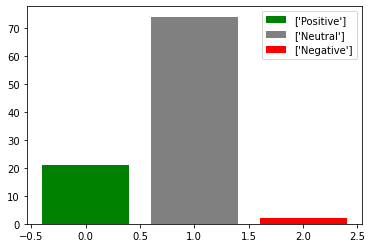

In [140]:
plt.bar([0], [len(df_pos)], label=['Positive'], color=['green'])
plt.bar([1], [len(df_neu)], label=['Neutral'], color=['grey'])
plt.bar([2], [ len(df_neg)], label=['Negative'], color=['red'])
plt.legend()
plt.show() 

In [141]:
print(len(df_neg))
print(len(df_pos))
print(len(df_neu))

2
21
74


In [38]:
import collections
from collections import Counter


In [39]:
positive_words = pd.DataFrame([dict(Counter(' '.join(df_pos['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

negative_words = pd.DataFrame([dict(Counter(' '.join(df_neg['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

neutral_words = pd.DataFrame([dict(Counter(' '.join(df_neu['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

In [40]:
positive_words

Index(['dogecoin', 'memes', 'funny', 'is', 'the', 'one', 'off', 'nfts', 'of',
       'doge', 'clearthelist', 'to', 'a', 'now', 'this', 'for',
       'digitalmarketing', 'first', 'greatest', 'that', 'and', 'joke', 'today',
       'last', 'change', 'worth', 'price', 'mdoge', 'total', 'hour', 'current',
       'in', 'linkedin', 'affiliate', 'money', 'earnmoney', 'bear', 'shopping',
       'love', 'place', 'safe', 'dogecoins', 'free', 'your', 'gift', 'would',
       'gifts', 'walk', 'tho', 'lol', 'market', 'cryptos', 'reelgooodmemes',
       'p', 'chronicle', 'best', 'things', 'happen', 'during', 'get', 'boxset',
       'send', 'will', 'masking', 'purpose', 'thanks', 'master', 'elon',
       'pump', 'dump', 'it', 'clear', 'was', 'really', 'just', 'scam',
       'response', 'early', 'result', 'pregnancy', 'scotch', 'general', 'my',
       'library', 'board', 'books', 'youtube', 'rating', 'breaking', 'news',
       'launch', 'confirmed', 'recommend'],
      dtype='object')

In [41]:
negative_words

Index(['dogecoin', 'i', 'is', 'off', 'nfts', 'to', 'sequence', 'proof', 'game',
       'bed', 'since', 'you', 're', 'with', 'all', 'being', 'mean', 'af', 'rn',
       'black', 'wen', 'decker', 'trimmer', 'm', 'original', 'clearthelist',
       'today', 'bsc', 'doge', 'not', 'real', 'going', 'cardano', 'guess',
       'try', 'data', 'reveals', 'roadmap', 'for', 'ada', 'price', 'crypto',
       'bitcoin', 'those', 'who', 'hate', 'or', 'stop', 'shocking', 'it',
       'from', 'progressing', 'they', 'will', 'fail', 'the', 'storm', 'on',
       'its', 'way', 'well', 'folding'],
      dtype='object')

In [43]:
# DATAFRAME OF SENTIMENT ANALYSIS OF THE COINS

# initialize list of lists
data = [['Positive', len(positive_words)], ['Neutral', len(neutral_words)], ['Negative', len(negative_words)]]



In [44]:
df = pd.DataFrame(data, columns=['Positive', 'Neutral', 'Negative'])

ValueError: 3 columns passed, passed data had 2 columns

In [45]:
data = {'Name': ['DGC'],
        'Positive': [len(df_pos)],
        'Neutral':[len(df_neu)],
        'Negative': [len(df_neg)] }


In [46]:
data = pd.DataFrame(data)
data

,Name,Positive,Neutral,Negative
0,DGC,24,63,6


In [47]:
data.to_csv('DGC_sentiment_analysis.csv')

In [112]:
##positive_words_df = pd.DataFrame(positive_words)

In [262]:
#negative_words_df = pd.DataFrame(negative_words)

In [263]:
#negative_words_df

In [265]:
#tweets_df['Polarity'] = tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)
#tweets_df['Result'] = tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

In [266]:
# df['category'].value_counts().plot(kind='bar')


In [274]:
plt.bar((positive_words).value_counts(), label=['Positive'], color=['green'])
plt.bar((negative_words).value_counts(), label=['Negative'], color=['red'])
plt.legend()
plt.show() 

TypeError: bar() missing 1 required positional argument: 'height'

In [268]:
#new_date = []

#for i in tweetsdf['date']:
   # a[5] + ' ' + a[1] + ' ' + a[2] + ' ' + a[3]
   # print(new_date)

In [269]:
## example

#new = []
#for tw in api.search_tweets(search, count=100):
 #   date = tw._json['created_at']
 #   text = tw._json['text']
 #   new.append({'date': date, 'text': text})

In [270]:
user = api.get_user(screen_name = 'cryptofeednews')._json
user['id']

950294018721763328

In [271]:
tweets =api.user_timeline(user_id = 950294018721763328)

In [272]:
for i in tweets:
    print(i._json['text'])

🔥🔥🔥 UNIQUE #NFT COLLECTION! 🔥🔥🔥

Disappearing Billionaires

Mark Zuckerberg (@meta)

Super rare artifact. Artwork b… https://t.co/Na8RC3Eib2
🔥🔥🔥HOTTEST #NFT COLLECTION! 🔥🔥🔥

Disappearing Billionaires

Elon Musk (@elonmusk)

Buy this Digital Masterpiece bef… https://t.co/OLJDvIWgZt
RT @PancakeSwap: ✍️ Unfortunately, the latest IFO proposal has been rejected. We will go back to the drawing board, make some adjustments b…
RT @BNBDtoken: 🚀 Secure your investment and get ready to fly!

Our referral program includes 4 levels of referral rewards. For the friends…
@BNBDriver 🎉 Congratulations!
RT @BNBDriver: 🔥 150 #BNB INVESTED

Thank #BNBDriver Community!
The light of a team’s unity is so powerful that it is able to irradiate the…
RT @binance: #Binance will support the @CeloOrg $CELO network upgrade &amp; hard fork.

Deposits and withdrawals of $CELO will be suspended app…
RT @VextPro: 💰#ApeSwap Pool increases the reward💰

Farm the #BANANA token on the #VEXTpro platform and get increased pass